In [1]:
from skimage.io import imread, imsave
import numpy as np
from skimage.filters import gaussian
import matplotlib.pyplot as plt

In [18]:
fname = '10x_1.0x_MC4100_pLPT107&41_1_MMStack_Pos0.ome.tif'
im_all = imread(fname)
im_all = im_all.transpose([0,2,3,1])
im_all = im_all[:,:,:,1:]
nt,nx,ny,nc = im_all.shape

In [19]:
bg = np.zeros((nt,))
for c in range(nc):
    bg[c] = im_all[:,:100,:100,c].mean()

In [20]:
edt = np.load('results/edt.npy')
edt = edt[:,:,:]


In [27]:
y,x = np.meshgrid(np.arange(nx), np.arange(ny))
edt0 = edt[-1,:,:]
minx = x[edt0>0].min()
maxx = x[edt0>0].max()
miny = y[edt0>0].min()
maxy = y[edt0>0].max()
w = maxx - minx
h = maxy - miny

print(w,h)
pad = 32

crop_im_all = np.zeros((nt,w+2*pad-1,h+2*pad-1,nc))
crop_edt = np.zeros((nt,w+2*pad-1,h+2*pad-1))
print(crop_im_all.shape)
print(crop_edt.shape)

for t in range(nt):
    tedt = edt[t,:,:]
    cx = int(x[tedt>0].mean())
    cy = int(y[tedt>0].mean())
    cim = im_all[t,cx - w//2 - pad:cx + w//2 + pad,cy - h//2 - pad:cy + h//2 + pad,:]
    crop_im_all[t,:,:,:] = cim
    crop_edt[t,:,:] = tedt[cx - w//2 - pad:cx + w//2 + pad,cy - h//2 - pad:cy + h//2 + pad]

447 447
(297, 510, 510, 4)
(297, 510, 510)
593 605
(510, 510, 4)
(297, 1200, 1200, 4)
591 605
(510, 510, 4)
(297, 1200, 1200, 4)
590 604
(510, 510, 4)
(297, 1200, 1200, 4)
591 605
(510, 510, 4)
(297, 1200, 1200, 4)
592 606
(510, 510, 4)
(297, 1200, 1200, 4)
593 606
(510, 510, 4)
(297, 1200, 1200, 4)
593 606
(510, 510, 4)
(297, 1200, 1200, 4)
595 607
(510, 510, 4)
(297, 1200, 1200, 4)
593 607
(510, 510, 4)
(297, 1200, 1200, 4)
593 607
(510, 510, 4)
(297, 1200, 1200, 4)
595 608
(510, 510, 4)
(297, 1200, 1200, 4)
594 608
(510, 510, 4)
(297, 1200, 1200, 4)
595 608
(510, 510, 4)
(297, 1200, 1200, 4)
594 608
(510, 510, 4)
(297, 1200, 1200, 4)
595 610
(510, 510, 4)
(297, 1200, 1200, 4)
596 610
(510, 510, 4)
(297, 1200, 1200, 4)
596 610
(510, 510, 4)
(297, 1200, 1200, 4)
596 611
(510, 510, 4)
(297, 1200, 1200, 4)
596 611
(510, 510, 4)
(297, 1200, 1200, 4)
597 611
(510, 510, 4)
(297, 1200, 1200, 4)
597 611
(510, 510, 4)
(297, 1200, 1200, 4)
597 610
(510, 510, 4)
(297, 1200, 1200, 4)
597 610
(51

NameError: name 'crop_edt_all' is not defined

In [28]:
im_all = crop_im_all
edt = crop_edt

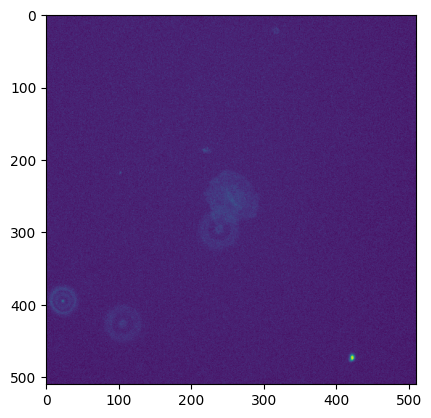

In [31]:
plt.imshow(im_all[0,:,:,1])

In [32]:
nt,nx,ny,nc = im_all.shape

normed_im = np.zeros((nt,nx,ny,nc))
normed_im[:,:,:,3] = im_all[:,:,:,0]
for t in range(nt):
    tedt = edt[t,:,:]
    for c in range(nc):
        tcim = im_all[t,:,:,c]
        mean_tcim = tcim[tedt>0].mean()
        std_tcim = tcim[tedt>0].std()
        min_tcim = tcim[tedt>0].min()
        max_tcim = tcim[tedt>0].max()
        #ntcim = (tcim - mean_tcim)/std_tcim
        ntcim = (tcim - min_tcim) / (max_tcim - min_tcim)
        ntcim[tedt==0] = 0 # np.nan
        normed_im[t,:,:,c] = ntcim

vmin = np.nanmin(normed_im)
vmax = np.nanmax(normed_im)
for t in range(nt):
    plt.figure(figsize=(12,12))
    #for c in range(nc):
    #    plt.subplot(1, 3, c + 1)
    #    plt.imshow(normed_im[t,:,:,c], vmin=vmin, vmax=vmax)
    #    plt.colorbar()
    #    plt.xticks([])
    #    plt.yticks([])
    plt.imshow(normed_im[t,:,:,0])
    plt.imshow(normed_im[t,:,:,1:])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.savefig('normed_channels_%04d.png'%t)
    plt.close()

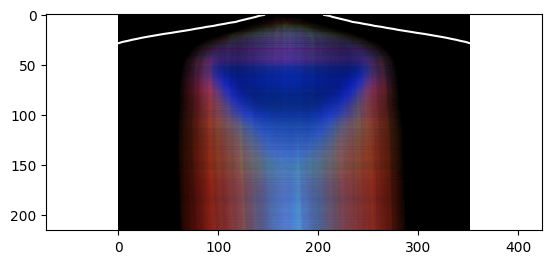

In [25]:
cx = nx // 2
cy = ny // 2
plt.imshow(normed_im[:,cx-16:cx+16,:,1:].mean(axis=1))
radius = edt.max(axis=(1,2))
plt.plot(cx + radius, np.arange(nt), 'w')
plt.plot(cx - radius, np.arange(nt), 'w')

In [26]:
nt,nx,ny,nc = im_all.shape
nr = 64
rw = 16
rs = np.linspace(rw, edt.max(), nr)
kymo = np.zeros((nt,nr,3)) + np.nan
nkymo = np.zeros((nt,nr,3)) + np.nan
for t in range(nt):
    for c in range(3):
        for ri in range(nr):
            tedt = edt[t,:,:]
            idx = np.abs(tedt - rs[ri]) < rw
            if np.sum(idx)>0:
                ntcim = im_all[t,:,:,1+c]
                kymo[t,ri,c] = np.nanmean(ntcim[idx])
                ntcnim = normed_im[t,:,:,1+c]
                nkymo[t,ri,c] = np.nanmean(ntcnim[idx])

In [17]:
nr = 64
rw = 8
rs = np.linspace(rw, edt.max(), nr)

cov = np.zeros((nt,nr,3,3))
corr = np.zeros((nt,nr,3))
mean = np.zeros((nt,nr,3))
for t in range(nt):
    for ri in range(nr):
        tedt = edt[t,:,:]
        idx = np.abs(tedt - rs[ri]) < rw
        if np.sum(idx)>0:
            #plt.figure()
            ntim0 = im_all[t,:,:,1].astype(float) - bg[1]
            ntim1 = im_all[t,:,:,2].astype(float) - bg[2]
            ntim2 = im_all[t,:,:,3].astype(float) - bg[3]
            x,y,z = ntim0[idx], ntim1[idx], ntim2[idx]
            C = np.cov(np.stack([x, y, z]))
            cov[t,ri,:,:] = C
            corr[t,ri,0] = np.corrcoef(x, y)[0,1]
            corr[t,ri,1] = np.corrcoef(x, z)[0,1]
            corr[t,ri,2] = np.corrcoef(y, z)[0,1]
            mean[t,ri,0] = x.mean()
            mean[t,ri,1] = y.mean()
            mean[t,ri,2] = z.mean()



/var/folders/k8/h6brl0ns6vz0_mrl3gdnlzj00000gn/T/ipykernel_11807/1954670824.py:18: RuntimeWarning: Degrees of freedom <= 0 for slice
  C = np.cov(np.stack([x, y, z]))
/Users/timrudge/opt/anaconda3/envs/infotracking/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/timrudge/opt/anaconda3/envs/infotracking/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/timrudge/opt/anaconda3/envs/infotracking/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/timrudge/opt/anaconda3/envs/infotracking/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/timrudge/opt/anaconda3/envs/infotracking/lib/python3.10

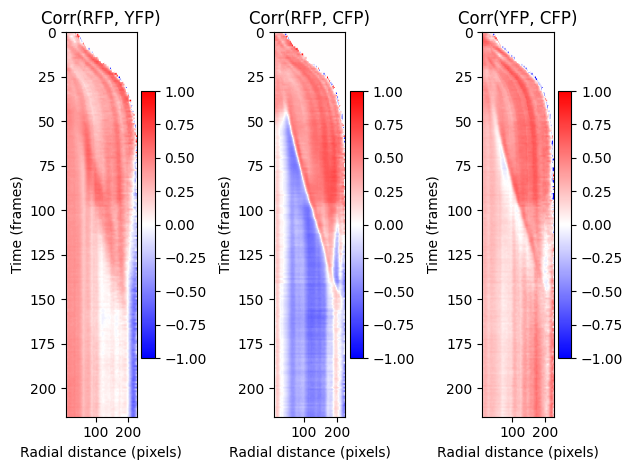

In [21]:
t0 = 0

plt.subplot(1,3,1)
plt.imshow(corr[t0:,:,0], extent=[rw,edt.max(),nt,0], aspect='auto', cmap='bwr', vmin=-1, vmax=1)
plt.ylabel('Time (frames)')
plt.xlabel('Radial distance (pixels)')
plt.title('Corr(RFP, YFP)')
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(corr[t0:,:,1], extent=[rw,edt.max(),nt,0], aspect='auto', cmap='bwr', vmin=-1, vmax=1)
plt.ylabel('Time (frames)')
plt.xlabel('Radial distance (pixels)')
plt.title('Corr(RFP, CFP)')
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(corr[t0:,:,2], extent=[rw,edt.max(),nt,0], aspect='auto', cmap='bwr', vmin=-1, vmax=1)
plt.ylabel('Time (frames)')
plt.xlabel('Radial distance (pixels)')
plt.title('Corr(YFP, CFP)')
plt.colorbar()

plt.tight_layout()

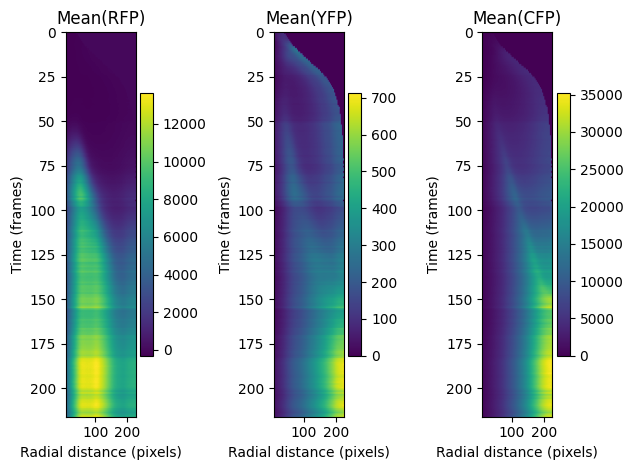

In [23]:
t0 = 0

plt.subplot(1,3,1)
plt.imshow(mean[t0:,:,0], extent=[rw,edt.max(),nt,0], aspect='auto')
plt.ylabel('Time (frames)')
plt.xlabel('Radial distance (pixels)')
plt.title('Mean(RFP)')
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(mean[t0:,:,1], extent=[rw,edt.max(),nt,0], aspect='auto')
plt.ylabel('Time (frames)')
plt.xlabel('Radial distance (pixels)')
plt.title('Mean(YFP)')
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(mean[t0:,:,2], extent=[rw,edt.max(),nt,0], aspect='auto')
plt.ylabel('Time (frames)')
plt.xlabel('Radial distance (pixels)')
plt.title('Mean(CFP)')
plt.colorbar()

plt.tight_layout()

(216, 64, 2)


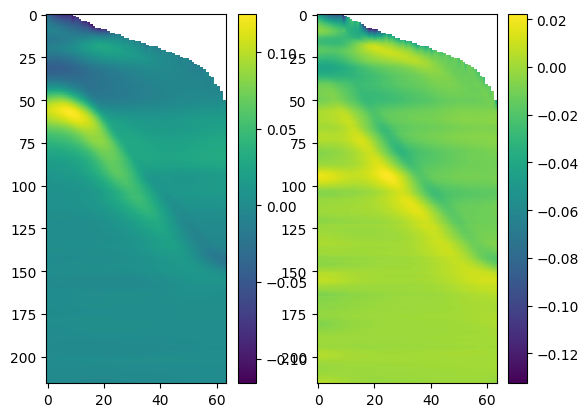

In [7]:
from scipy.signal import savgol_filter
kymo_rho = np.stack([kymo[:,:,0] / kymo[:,:,2], kymo[:,:,1] / kymo[:,:,2]], axis=2)
print(kymo_rho.shape)
lkymo_rho = np.log(kymo_rho)
dlkymo_rho = np.zeros_like(lkymo_rho) + np.nan
for r in range(nr):
    for c in range(2):
        idx = ~np.isnan(lkymo_rho[:,r,c])
        dlkymo_rho[idx,r,c] = savgol_filter(lkymo_rho[idx,r,c], 21, 3, deriv=1, axis=0)
plt.subplot(1, 2, 1)
plt.imshow(dlkymo_rho[:,:,0], aspect='auto')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(dlkymo_rho[:,:,1], aspect='auto')
plt.colorbar()

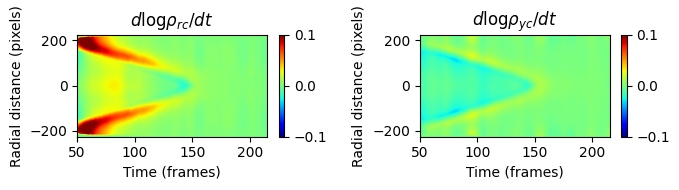

In [8]:
def map_func(p, edt, rs):
    rstep = np.mean(np.diff(rs))
    npos = p.shape[0]
    for i in range(npos):
        r,t = p[i,:].astype(int)
        p[i,0] = (edt[t,:,:].max() - rs[r]) / rstep
    return p

from skimage.transform import warp
wdlkymo_rho = np.zeros_like(dlkymo_rho)
for c in range(2):
    wdlkymo_rho[:,:,c] = warp(dlkymo_rho[:,:,c], map_func, {'edt':edt, 'rs':rs})
wdlkymo_rho[np.isnan(dlkymo_rho)] = np.nan

plt.figure(figsize=(7,2))
plt.subplot(1, 2, 1)
plt.imshow(np.hstack([wdlkymo_rho[50:,::-1,0],wdlkymo_rho[50:,:,0]]).transpose(), 
           aspect='auto', 
           extent=[50,215,-edt.max(),edt.max()],
           vmin=-0.1, vmax=0.1,
           cmap='jet')
plt.colorbar()
plt.xlabel('Time (frames)')
plt.ylabel('Radial distance (pixels)')
plt.title('$d\mathrm{log}\\rho_{rc}/dt$')

plt.subplot(1, 2, 2)
plt.imshow(np.hstack([wdlkymo_rho[50:,::-1,1],wdlkymo_rho[50:,:,1]]).transpose(), 
           aspect='auto', 
           extent=[50,215,-edt.max(),edt.max()],
           vmin=-0.1, vmax=0.1,
           cmap='jet')
plt.colorbar()
plt.xlabel('Time (frames)')
plt.ylabel('Radial distance (pixels)')
plt.title('$d\mathrm{log}\\rho_{yc}/dt$')

plt.tight_layout()
plt.savefig('wdlkymo_rho.png', dpi=300)


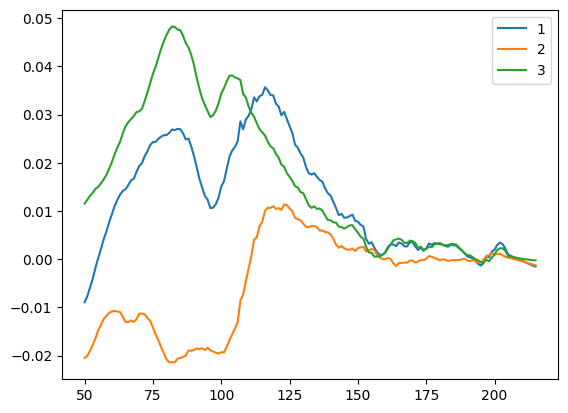

In [107]:
plt.plot(np.arange(50, 216), wdlkymo_rho[50:,24,:])
plt.plot(np.arange(50, 216), wdlkymo_rho[50:,24,0] - wdlkymo_rho[50:,24,1])
#plt.legend(rs[np.arange(20,28)])
plt.legend([1,2,3])

array([[143., 163., 249.],
       [192., 171., 229.],
       [192., 176., 202.]])

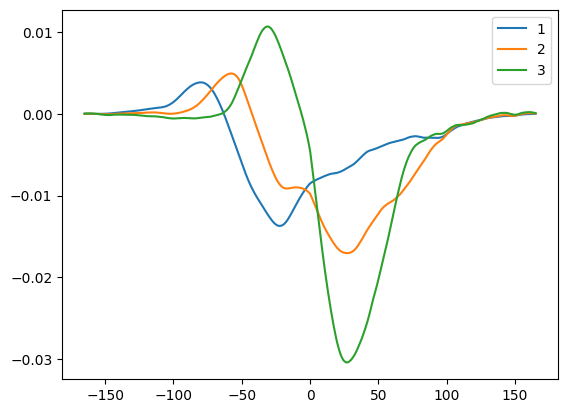

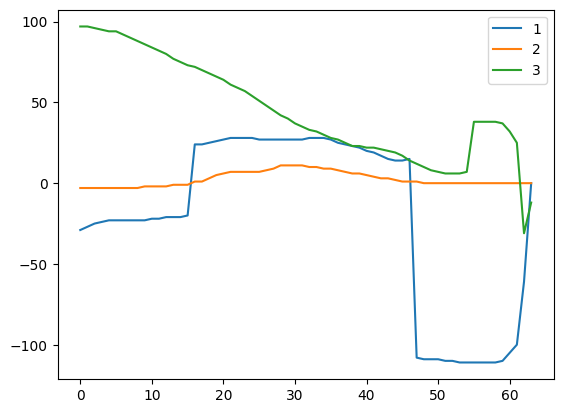

In [72]:
from scipy.signal import correlate, correlation_lags
cc = np.zeros((331,nr,3))
peaks = np.zeros((nr,3))
for r in range(nr):
    cc[:,r,0] = correlate(wdlkymo_rho[50:,r,0], wdlkymo_rho[50:,r,1], 'full')
    peaks[r,0] = np.argmin(cc[:,r,0])
    cc[:,r,1] = correlate(wdlkymo_rho[50:,r,0], wdlkymo_rho[50:,r,1] - wdlkymo_rho[50:,r,0], 'full')
    peaks[r,1] = np.argmin(cc[:,r,1])
    cc[:,r,2] = correlate(wdlkymo_rho[50:,r,1], wdlkymo_rho[50:,r,1] - wdlkymo_rho[50:,r,0], 'full')
    peaks[r,2] = np.argmin(cc[:,r,2])
#plt.imshow(cc[:,:,0])
nnt = wdlkymo_rho.shape[0] - 50
lags = correlation_lags(nnt, nnt)

plt.figure()
plt.plot(lags, cc[:,10,0])
plt.plot(lags, cc[:,20,0])
plt.plot(lags, cc[:,30,0])
plt.legend([1,2,3])

plt.figure()
plt.plot(lags[peaks.astype(int)])
plt.legend([1,2,3])

peaks[[10,20,30]]

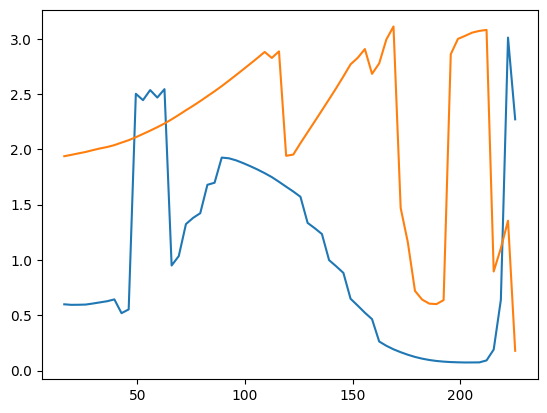

In [106]:
from numpy.fft import fft, fftshift, fftfreq

Ts = np.zeros((nr,2))
phases = np.zeros((nr,2))
for r in range(nr):
    for c in range(2):
        s = wdlkymo_rho[50:,r,c]
        ft = fft(s - s.mean(), len(s)*16)
        ps = (ft * ft.conjugate()).real
        freqs = fftfreq(len(ft))
        idx = (freqs<0.05) * (freqs>0)
        #plt.plot(freqs[idx], ps[idx], '.')

        pkidx = np.argmax(ps)
        f0 = freqs[pkidx]
        T = abs(1/f0)
        Ts[r,c] = T

        phase = np.angle(ft[pkidx])
        #if phase<0:
        #    phase = np.pi + phase
        phases[r,c] = abs(phase)
plt.plot(rs, phases)

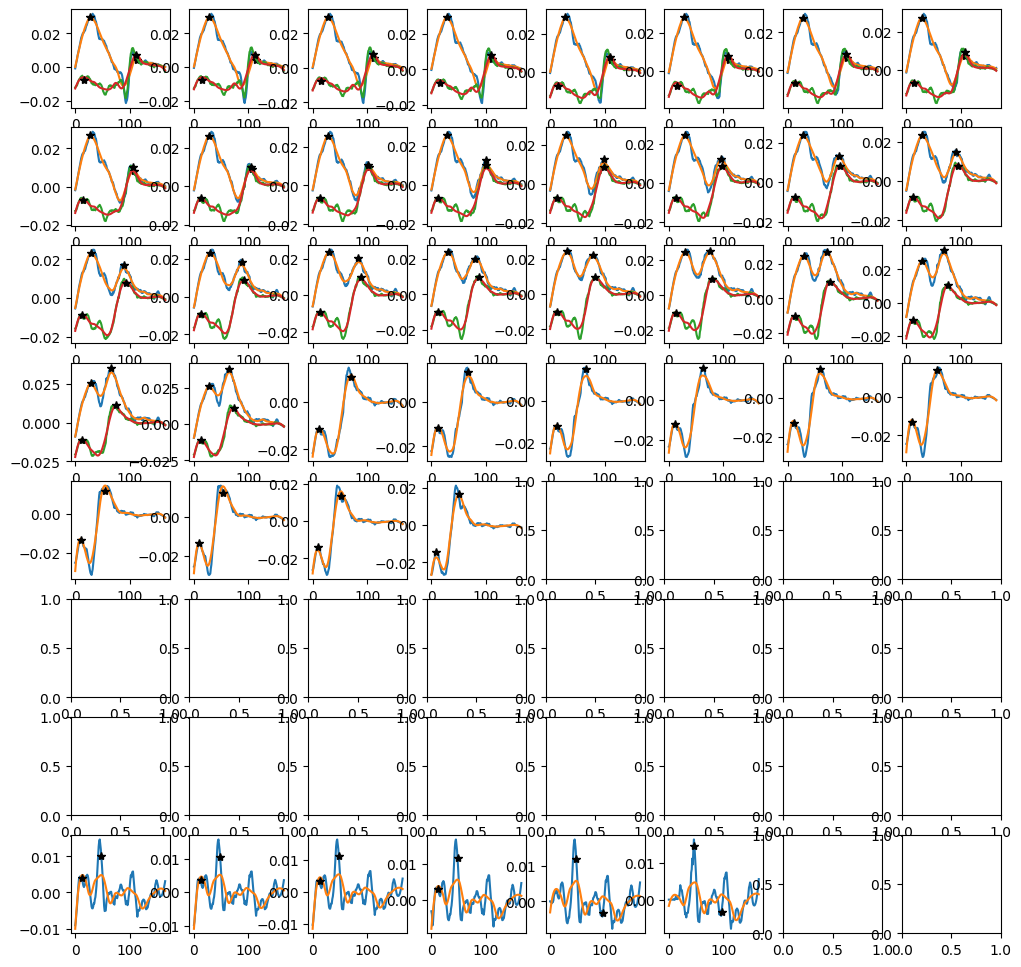

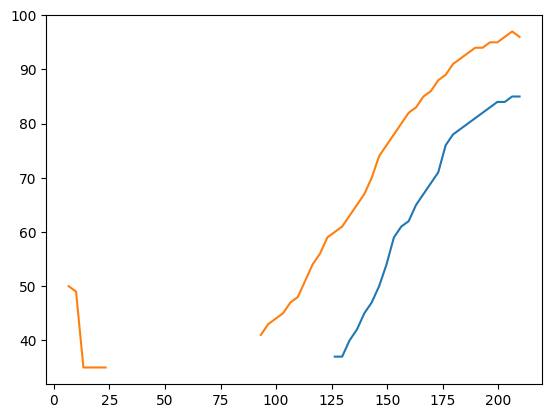

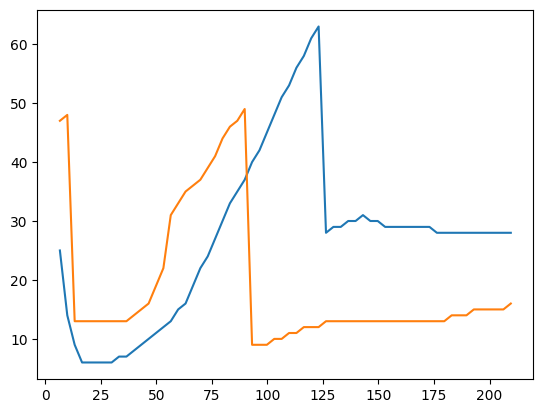

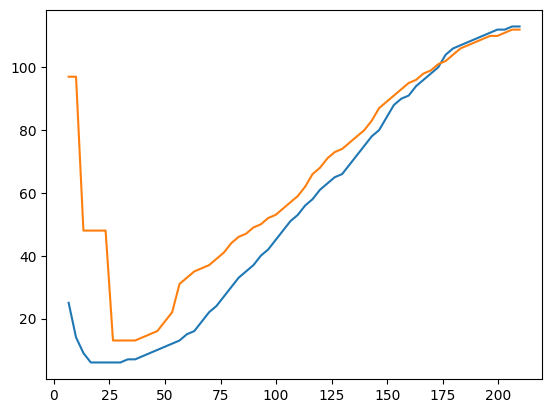

In [20]:
from scipy.signal import find_peaks

plt.figure(figsize=(12,12))
Ts = np.zeros((nr,2)) + np.nan
phases = np.zeros((nr,2,2)) + np.nan
for r in range(nr):
    plt.subplot(8,8,r+1)
    for c in range(2):
        s = wdlkymo_rho[50:,r,c]
        ss = savgol_filter(s, 41, 3)
        pks = find_peaks(ss, prominence=0.005)[0]
        if len(pks)>1:
            T = np.mean(np.diff(pks))
            Ts[r,c] = T
            plt.plot(s)
            plt.plot(ss)
            plt.plot(pks, s[pks], 'k*')
        if len(pks)>0:
            phases[r,c,:] = pks

plt.figure()
plt.plot(edt.max() - rs, Ts)
plt.figure()
plt.plot(edt.max() - rs, phases[:,:,0])
plt.figure()
plt.plot(edt.max() - rs, phases[:,:,1])

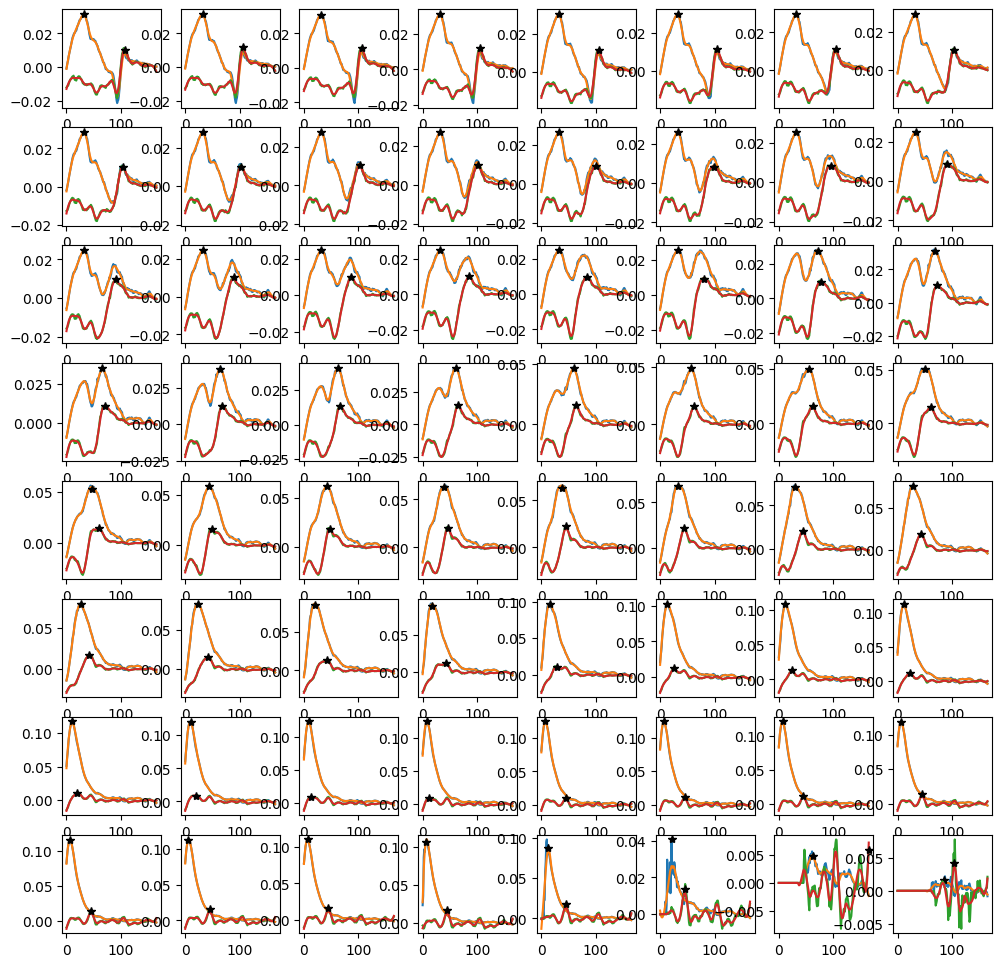

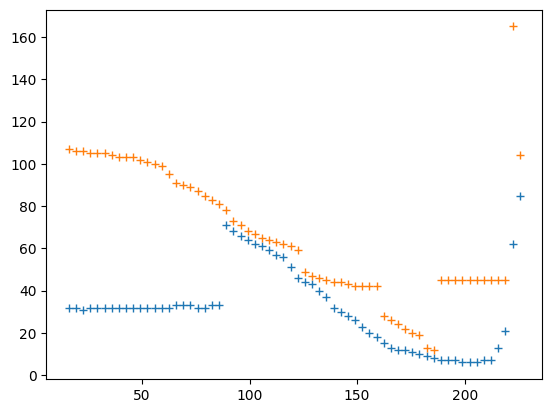

In [9]:
plt.figure(figsize=(12,12))
Ts = np.zeros((nr,2)) + np.nan
for r in range(nr):
    plt.subplot(8,8,r+1)
    for c in range(2):
        s = wdlkymo_rho[50:,r,c]
        ss = savgol_filter(s, 21, 3)
        T = np.argmax(ss)
        Ts[r,c] = T
        plt.plot(s)
        plt.plot(ss)
        plt.plot(T, s[T], 'k*')

plt.figure()
plt.plot(rs, Ts, '+')

In [ ]:
cf = np.zeros((nt,3))
for t in range(nt):
    tedt = edt[t,:,:]
    for c in range(3):
        tcim = im_all[t,:,:,c+1]
        idx = tedt.max() - tedt < 16
        cf[t,c] = np.nanmean(tcim[idx])

In [ ]:
crho_rc = cf[:,0] / cf[:,2]
crho_yc = cf[:,1] / cf[:,2]
crho_ry = cf[:,0] / cf[:,1]

lcrho_rc = np.log(crho_rc)
lcrho_yc = np.log(crho_yc)
lcrho_ry = np.log(crho_ry)

dlcrho_rc = savgol_filter(lcrho_rc, 21, 3, deriv=1)
dlcrho_yc = savgol_filter(lcrho_yc, 21, 3, deriv=1)
dlcrho_ry = savgol_filter(lcrho_ry, 21, 3, deriv=1)

In [ ]:
plt.plot(dlcrho_rc)
plt.plot(dlcrho_yc)
plt.plot(dlcrho_ry)

In [ ]:
from scipy.integrate import odeint

alpha_r, alpha_c = 1,1
k_r, k_c = 1,1
p = 10
n = 1

ir,ic = np.meshgrid(np.linspace(0,1), np.linspace(0,1))
drhodt = (alpha_r * k_r * ir - alpha_c * k_c * ic) * p**n / (1 + k_r * p**n + k_c * p**n)

In [ ]:
plt.imshow(drhodt)
plt.colorbar()